In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import scanpy as sc
from scipy import sparse
from scipy.special import softmax

import networkx as nx
import torch

ROOT = Path('../')
sys.path.append(str(ROOT))
import came
from came import pipeline, pp, pl

Using backend: pytorch


In [2]:
from came.utils import load_example_data

example_data_dict = load_example_data()
print(example_data_dict.keys())

dsnames = ('Baron_human', 'Baron_mouse')

adatas = example_data_dict['adatas']
dsnames = example_data_dict['dataset_names']
df_varmap = example_data_dict['varmap']
df_varmap_1v1 = example_data_dict['varmap_1v1']

key_class1 = key_class2 = example_data_dict['key_class']

# setting directory for results
time_tag = came.make_nowtime_tag()
resdir = ROOT /'_temp' / f'{dsnames}-{time_tag}'
figdir = resdir / 'figs'
came.check_dirs(figdir)

dict_keys(['adatas', 'varmap', 'varmap_1v1', 'dataset_names', 'key_class'])
a new directory made:
	..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)\figs


In [ ]:
# ========= customize paths ==========
datadir = ROOT / 'came/sample_data'
sp1, sp2 = ('human', 'mouse')
dsnames = ('Baron_human', 'Baron_mouse')

df_varmap_1v1 = pd.read_csv(datadir / f'gene_matches_1v1_{sp1}2{sp2}.csv', )
df_varmap = pd.read_csv(datadir / f'gene_matches_{sp1}2{sp2}.csv', )

dsn1, dsn2 = dsnames
adata_raw1 = sc.read_h5ad(datadir / f'raw-{dsn1}.h5ad')
adata_raw2 = sc.read_h5ad(datadir / f'raw-{dsn2}.h5ad')
adatas = [adata_raw1, adata_raw2]

key_class1 = 'cell_ontology_class'
key_class2 = 'cell_ontology_class'

# setting directory for results
time_tag = make_nowtime_tag()
resdir = ROOT /'_temp' / f'{dsnames}-{time_tag}'


In [ ]:
# ====== subsampling and filtering genes (optional) =====

for _adt, _name in zip([adata_raw1, adata_raw2], dsnames):
    if _adt.shape[0] >= 2e4:
        print(f'Doing subsampling for {_name}')
        sc.pp.subsample(_adt, fraction=0.5)

sc.pp.filter_genes(adata_raw1, min_cells=3)
sc.pp.filter_genes(adata_raw2, min_cells=3)

In [3]:
''' default pipeline of CAME
'''
n_epochs = 200
batch_size = 2048

came_inputs, (adata1, adata2) = pipeline.preprocess_unaligned(
    adatas,
    key_class=key_class1,
    use_scnets=True,
)

dpair, trainer, h_dict, predictor, ENV_VARs = pipeline.main_for_unaligned(
    **came_inputs,
    df_varmap=df_varmap,
    df_varmap_1v1=df_varmap_1v1,
    dataset_names=dsnames,
    key_class1=key_class1,
    key_class2=key_class2,
    do_normalize=True,
    n_epochs=n_epochs,
    resdir=resdir,
    n_pass=100,
    params_model=dict(residual=False),
    batch_size=batch_size,
)

obs_ids1, obs_ids2 = dpair.obs_ids1, dpair.obs_ids2
obs = dpair.obs
classes = predictor.classes


A copy of AnnData made!
No copy was made, the input AnnData will be changed!
normalizing datasets with default settings.
performing total-sum normalization, target_sum=None...
using the build-in function `sc.pp.scale(..)`


C:\Users\Administrator\anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


A copy of AnnData made!
No copy was made, the input AnnData will be changed!
normalizing datasets with default settings.
performing total-sum normalization, target_sum=None...
using the build-in function `sc.pp.scale(..)`


C:\Users\Administrator\anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


0    569
1    321
2    279
3    254
4    223
5    133
6     62
7     45
Name: clust_lbs, dtype: int64
[leiden] Time used:  0.2783 s
computing differentially expressed genes using t-test
computing differential expression analysis using default settings,
 (assume that the expressioin values are already normalized)
groups to be removed:
	 []
650 genes before taking unique
taking total of 501 unique differential expressed genes
computing differentially expressed genes using t-test
computing differential expression analysis using default settings,
 (assume that the expressioin values are already normalized)
groups to be removed:
	 []
400 genes before taking unique
taking total of 345 unique differential expressed genes
already exsists:
	..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)\figs
already exsists:
	..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)
No copy was made, the input AnnData will be changed!
normalizing datasets with default settings.
performing total-sum nor

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\torch\nn\modules\container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")
 17%|██████████████                                                                      | 1/6 [00:00<00:00,  5.74it/s]

==================start training==================


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.89it/s]

Epoch 00000 | Train Acc: 0.0739 | Test Acc: 0.1251 (max=0.1251) | AMI=0.0393 | Time: 0.8267


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.41it/s]

Epoch 00001 | Train Acc: 0.3452 | Test Acc: 0.4756 (max=0.4756) | AMI=0.2140 | Time: 0.6441


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00002 | Train Acc: 0.4058 | Test Acc: 0.4783 (max=0.4783) | AMI=0.3661 | Time: 0.5678


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00003 | Train Acc: 0.4983 | Test Acc: 0.5392 (max=0.5392) | AMI=0.4070 | Time: 0.5185


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00004 | Train Acc: 0.5574 | Test Acc: 0.6326 (max=0.6326) | AMI=0.4551 | Time: 0.4888


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00005 | Train Acc: 0.6575 | Test Acc: 0.6644 (max=0.6644) | AMI=0.5017 | Time: 0.4704


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00006 | Train Acc: 0.6626 | Test Acc: 0.6925 (max=0.6925) | AMI=0.5372 | Time: 0.4561


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00007 | Train Acc: 0.7632 | Test Acc: 0.7344 (max=0.7344) | AMI=0.5612 | Time: 0.4455


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00008 | Train Acc: 0.7855 | Test Acc: 0.7476 (max=0.7476) | AMI=0.5693 | Time: 0.4373


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

Epoch 00009 | Train Acc: 0.6395 | Test Acc: 0.5186 (max=0.7476) | AMI=0.4736 | Time: 0.4304


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00010 | Train Acc: 0.6501 | Test Acc: 0.7455 (max=0.7476) | AMI=0.5771 | Time: 0.4251


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.16it/s]

Epoch 00011 | Train Acc: 0.7188 | Test Acc: 0.5509 (max=0.7476) | AMI=0.5314 | Time: 0.4233


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.88it/s]

Epoch 00012 | Train Acc: 0.8540 | Test Acc: 0.7842 (max=0.7842) | AMI=0.6302 | Time: 0.4300


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00013 | Train Acc: 0.8771 | Test Acc: 0.8261 (max=0.8261) | AMI=0.6620 | Time: 0.4268


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

Epoch 00014 | Train Acc: 0.8771 | Test Acc: 0.8277 (max=0.8277) | AMI=0.6790 | Time: 0.4231


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.78it/s]

Epoch 00015 | Train Acc: 0.9064 | Test Acc: 0.8505 (max=0.8505) | AMI=0.6659 | Time: 0.4241


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.80it/s]

Epoch 00016 | Train Acc: 0.9329 | Test Acc: 0.8298 (max=0.8505) | AMI=0.6604 | Time: 0.4271


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00017 | Train Acc: 0.9424 | Test Acc: 0.8531 (max=0.8531) | AMI=0.6731 | Time: 0.4248


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.75it/s]

Epoch 00018 | Train Acc: 0.9311 | Test Acc: 0.8690 (max=0.8690) | AMI=0.6685 | Time: 0.4226


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.02it/s]

Epoch 00019 | Train Acc: 0.9257 | Test Acc: 0.8674 (max=0.8690) | AMI=0.6595 | Time: 0.4231


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00020 | Train Acc: 0.9483 | Test Acc: 0.8977 (max=0.8977) | AMI=0.7263 | Time: 0.4211


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00021 | Train Acc: 0.9568 | Test Acc: 0.8982 (max=0.8982) | AMI=0.7187 | Time: 0.4192


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00022 | Train Acc: 0.9620 | Test Acc: 0.9046 (max=0.9046) | AMI=0.7439 | Time: 0.4170


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00023 | Train Acc: 0.9728 | Test Acc: 0.9109 (max=0.9109) | AMI=0.7338 | Time: 0.4155


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00024 | Train Acc: 0.9751 | Test Acc: 0.9210 (max=0.9210) | AMI=0.7432 | Time: 0.4137


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00025 | Train Acc: 0.9811 | Test Acc: 0.9236 (max=0.9236) | AMI=0.7329 | Time: 0.4122


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00026 | Train Acc: 0.9839 | Test Acc: 0.9115 (max=0.9236) | AMI=0.7269 | Time: 0.4108


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.99it/s]

Epoch 00027 | Train Acc: 0.9816 | Test Acc: 0.9183 (max=0.9236) | AMI=0.7355 | Time: 0.4095


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.32it/s]

Epoch 00028 | Train Acc: 0.9832 | Test Acc: 0.9125 (max=0.9236) | AMI=0.7130 | Time: 0.4087


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.38it/s]

Epoch 00029 | Train Acc: 0.9803 | Test Acc: 0.8823 (max=0.9236) | AMI=0.6689 | Time: 0.4088


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

Epoch 00030 | Train Acc: 0.9747 | Test Acc: 0.8908 (max=0.9236) | AMI=0.6992 | Time: 0.4088


 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.89it/s]

Epoch 00031 | Train Acc: 0.9673 | Test Acc: 0.8860 (max=0.9236) | AMI=0.7086 | Time: 0.4096


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.14it/s]

Epoch 00032 | Train Acc: 0.9819 | Test Acc: 0.9183 (max=0.9236) | AMI=0.7421 | Time: 0.4138


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.59it/s]

Epoch 00033 | Train Acc: 0.9831 | Test Acc: 0.9263 (max=0.9263) | AMI=0.7550 | Time: 0.4151


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Epoch 00034 | Train Acc: 0.9879 | Test Acc: 0.9258 (max=0.9263) | AMI=0.7408 | Time: 0.4175


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 10.41it/s]

Epoch 00035 | Train Acc: 0.9877 | Test Acc: 0.9162 (max=0.9263) | AMI=0.7332 | Time: 0.4195


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.32it/s]

Epoch 00036 | Train Acc: 0.9896 | Test Acc: 0.9221 (max=0.9263) | AMI=0.7488 | Time: 0.4212


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.78it/s]

Epoch 00037 | Train Acc: 0.9910 | Test Acc: 0.9056 (max=0.9263) | AMI=0.7296 | Time: 0.4219


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

Epoch 00038 | Train Acc: 0.9915 | Test Acc: 0.9279 (max=0.9279) | AMI=0.7488 | Time: 0.4227


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.06it/s]

Epoch 00039 | Train Acc: 0.9917 | Test Acc: 0.9189 (max=0.9279) | AMI=0.7420 | Time: 0.4230


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.38it/s]

Epoch 00040 | Train Acc: 0.9898 | Test Acc: 0.9242 (max=0.9279) | AMI=0.7354 | Time: 0.4233


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.38it/s]

Epoch 00041 | Train Acc: 0.9798 | Test Acc: 0.8982 (max=0.9279) | AMI=0.6960 | Time: 0.4227


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.80it/s]

Epoch 00042 | Train Acc: 0.9495 | Test Acc: 0.8218 (max=0.9279) | AMI=0.5971 | Time: 0.4220


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00043 | Train Acc: 0.9755 | Test Acc: 0.8674 (max=0.9279) | AMI=0.6753 | Time: 0.4212


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.48it/s]

Epoch 00044 | Train Acc: 0.9858 | Test Acc: 0.9353 (max=0.9353) | AMI=0.7803 | Time: 0.4205


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.88it/s]

Epoch 00045 | Train Acc: 0.9893 | Test Acc: 0.9194 (max=0.9353) | AMI=0.7651 | Time: 0.4198


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

Epoch 00046 | Train Acc: 0.9903 | Test Acc: 0.9210 (max=0.9353) | AMI=0.7624 | Time: 0.4194


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

Epoch 00047 | Train Acc: 0.9923 | Test Acc: 0.9300 (max=0.9353) | AMI=0.7791 | Time: 0.4190


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00048 | Train Acc: 0.9929 | Test Acc: 0.9236 (max=0.9353) | AMI=0.7603 | Time: 0.4185


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.07it/s]

Epoch 00049 | Train Acc: 0.9943 | Test Acc: 0.9295 (max=0.9353) | AMI=0.7674 | Time: 0.4178


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.50it/s]

Epoch 00050 | Train Acc: 0.9947 | Test Acc: 0.9279 (max=0.9353) | AMI=0.7671 | Time: 0.4173


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.27it/s]

Epoch 00051 | Train Acc: 0.9951 | Test Acc: 0.9327 (max=0.9353) | AMI=0.7814 | Time: 0.4169


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.07it/s]

Epoch 00052 | Train Acc: 0.9951 | Test Acc: 0.9305 (max=0.9353) | AMI=0.7708 | Time: 0.4166


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.69it/s]

Epoch 00053 | Train Acc: 0.9963 | Test Acc: 0.9305 (max=0.9353) | AMI=0.7679 | Time: 0.4162


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

Epoch 00054 | Train Acc: 0.9961 | Test Acc: 0.9364 (max=0.9364) | AMI=0.7746 | Time: 0.4157


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.80it/s]

Epoch 00055 | Train Acc: 0.9944 | Test Acc: 0.9353 (max=0.9364) | AMI=0.7804 | Time: 0.4154


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

Epoch 00056 | Train Acc: 0.9952 | Test Acc: 0.9396 (max=0.9396) | AMI=0.7816 | Time: 0.4151


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

Epoch 00057 | Train Acc: 0.9947 | Test Acc: 0.9406 (max=0.9406) | AMI=0.7757 | Time: 0.4148


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00058 | Train Acc: 0.9937 | Test Acc: 0.9438 (max=0.9438) | AMI=0.7754 | Time: 0.4145


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

Epoch 00059 | Train Acc: 0.9923 | Test Acc: 0.9300 (max=0.9438) | AMI=0.7681 | Time: 0.4140


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.80it/s]

Epoch 00060 | Train Acc: 0.9940 | Test Acc: 0.9438 (max=0.9438) | AMI=0.7724 | Time: 0.4135


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.17it/s]

Epoch 00061 | Train Acc: 0.9949 | Test Acc: 0.9475 (max=0.9475) | AMI=0.7780 | Time: 0.4130


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.69it/s]

Epoch 00062 | Train Acc: 0.9947 | Test Acc: 0.9337 (max=0.9475) | AMI=0.7690 | Time: 0.4127


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00063 | Train Acc: 0.9958 | Test Acc: 0.9486 (max=0.9486) | AMI=0.7917 | Time: 0.4126


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.41it/s]

Epoch 00064 | Train Acc: 0.9965 | Test Acc: 0.9449 (max=0.9486) | AMI=0.7892 | Time: 0.4122


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.14it/s]

Epoch 00065 | Train Acc: 0.9963 | Test Acc: 0.9470 (max=0.9486) | AMI=0.7886 | Time: 0.4130


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.78it/s]

Epoch 00066 | Train Acc: 0.9966 | Test Acc: 0.9417 (max=0.9486) | AMI=0.7781 | Time: 0.4132


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.17it/s]

Epoch 00067 | Train Acc: 0.9965 | Test Acc: 0.9406 (max=0.9486) | AMI=0.7690 | Time: 0.4134


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00068 | Train Acc: 0.9966 | Test Acc: 0.9369 (max=0.9486) | AMI=0.7764 | Time: 0.4132


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Epoch 00069 | Train Acc: 0.9957 | Test Acc: 0.9443 (max=0.9486) | AMI=0.7901 | Time: 0.4131


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.62it/s]

Epoch 00070 | Train Acc: 0.9965 | Test Acc: 0.9449 (max=0.9486) | AMI=0.7695 | Time: 0.4150


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.69it/s]

Epoch 00071 | Train Acc: 0.9949 | Test Acc: 0.9411 (max=0.9486) | AMI=0.7724 | Time: 0.4162


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.38it/s]

Epoch 00072 | Train Acc: 0.9918 | Test Acc: 0.9380 (max=0.9486) | AMI=0.7705 | Time: 0.4165


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00073 | Train Acc: 0.9924 | Test Acc: 0.9358 (max=0.9486) | AMI=0.7727 | Time: 0.4160


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.97it/s]

Epoch 00074 | Train Acc: 0.9891 | Test Acc: 0.9427 (max=0.9486) | AMI=0.7720 | Time: 0.4157


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00075 | Train Acc: 0.9946 | Test Acc: 0.9433 (max=0.9486) | AMI=0.7776 | Time: 0.4156


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.14it/s]

Epoch 00076 | Train Acc: 0.9947 | Test Acc: 0.9427 (max=0.9486) | AMI=0.7824 | Time: 0.4151


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00077 | Train Acc: 0.9958 | Test Acc: 0.9443 (max=0.9486) | AMI=0.7843 | Time: 0.4146


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00078 | Train Acc: 0.9965 | Test Acc: 0.9486 (max=0.9486) | AMI=0.7784 | Time: 0.4142


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00079 | Train Acc: 0.9971 | Test Acc: 0.9449 (max=0.9486) | AMI=0.7839 | Time: 0.4137


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.97it/s]

Epoch 00080 | Train Acc: 0.9974 | Test Acc: 0.9401 (max=0.9486) | AMI=0.7722 | Time: 0.4134


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 12.81it/s]

Epoch 00081 | Train Acc: 0.9974 | Test Acc: 0.9422 (max=0.9486) | AMI=0.7735 | Time: 0.4132


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.06it/s]

Epoch 00082 | Train Acc: 0.9979 | Test Acc: 0.9385 (max=0.9486) | AMI=0.7758 | Time: 0.4140


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 12.33it/s]

Epoch 00083 | Train Acc: 0.9974 | Test Acc: 0.9348 (max=0.9486) | AMI=0.7677 | Time: 0.4145


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.69it/s]

Epoch 00084 | Train Acc: 0.9978 | Test Acc: 0.9433 (max=0.9486) | AMI=0.7876 | Time: 0.4145


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00085 | Train Acc: 0.9974 | Test Acc: 0.9401 (max=0.9486) | AMI=0.7787 | Time: 0.4141


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00086 | Train Acc: 0.9972 | Test Acc: 0.9438 (max=0.9486) | AMI=0.7750 | Time: 0.4139


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00087 | Train Acc: 0.9963 | Test Acc: 0.9390 (max=0.9486) | AMI=0.7641 | Time: 0.4135


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00088 | Train Acc: 0.9932 | Test Acc: 0.9353 (max=0.9486) | AMI=0.7715 | Time: 0.4130


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00089 | Train Acc: 0.9947 | Test Acc: 0.9417 (max=0.9486) | AMI=0.7760 | Time: 0.4125


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00090 | Train Acc: 0.9929 | Test Acc: 0.9433 (max=0.9486) | AMI=0.7765 | Time: 0.4120


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00091 | Train Acc: 0.9944 | Test Acc: 0.9178 (max=0.9486) | AMI=0.7403 | Time: 0.4115


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00092 | Train Acc: 0.9950 | Test Acc: 0.9327 (max=0.9486) | AMI=0.7540 | Time: 0.4111


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00093 | Train Acc: 0.9942 | Test Acc: 0.9263 (max=0.9486) | AMI=0.7681 | Time: 0.4107


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00094 | Train Acc: 0.9947 | Test Acc: 0.9183 (max=0.9486) | AMI=0.7390 | Time: 0.4103


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00095 | Train Acc: 0.9963 | Test Acc: 0.9194 (max=0.9486) | AMI=0.7363 | Time: 0.4099


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00096 | Train Acc: 0.9971 | Test Acc: 0.9231 (max=0.9486) | AMI=0.7421 | Time: 0.4095


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00097 | Train Acc: 0.9968 | Test Acc: 0.9199 (max=0.9486) | AMI=0.7552 | Time: 0.4091


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00098 | Train Acc: 0.9979 | Test Acc: 0.9199 (max=0.9486) | AMI=0.7467 | Time: 0.4087


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

[current best] model weights backup
Epoch 00099 | Train Acc: 0.9964 | Test Acc: 0.9146 (max=0.9486) | AMI=0.7334 | Time: 0.4084


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00100 | Train Acc: 0.9949 | Test Acc: 0.9008 (max=0.9486) | AMI=0.7328 | Time: 0.4082


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

[current best] model weights backup
Epoch 00101 | Train Acc: 0.9954 | Test Acc: 0.9189 (max=0.9486) | AMI=0.7470 | Time: 0.4079


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00102 | Train Acc: 0.9961 | Test Acc: 0.9215 (max=0.9486) | AMI=0.7461 | Time: 0.4075


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

Epoch 00103 | Train Acc: 0.9951 | Test Acc: 0.9189 (max=0.9486) | AMI=0.7459 | Time: 0.4071


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

[current best] model weights backup
Epoch 00104 | Train Acc: 0.9953 | Test Acc: 0.9194 (max=0.9486) | AMI=0.7530 | Time: 0.4068


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

[current best] model weights backup
Epoch 00105 | Train Acc: 0.9953 | Test Acc: 0.9268 (max=0.9486) | AMI=0.7613 | Time: 0.4065


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

[current best] model weights backup
Epoch 00106 | Train Acc: 0.9952 | Test Acc: 0.9380 (max=0.9486) | AMI=0.7660 | Time: 0.4062


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.14it/s]

Epoch 00107 | Train Acc: 0.9952 | Test Acc: 0.9274 (max=0.9486) | AMI=0.7600 | Time: 0.4058


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

[current best] model weights backup
Epoch 00108 | Train Acc: 0.9964 | Test Acc: 0.9337 (max=0.9486) | AMI=0.7663 | Time: 0.4056


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

[current best] model weights backup
Epoch 00109 | Train Acc: 0.9968 | Test Acc: 0.9364 (max=0.9486) | AMI=0.7667 | Time: 0.4053


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

[current best] model weights backup
Epoch 00110 | Train Acc: 0.9977 | Test Acc: 0.9321 (max=0.9486) | AMI=0.7716 | Time: 0.4050


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.02it/s]

Epoch 00111 | Train Acc: 0.9974 | Test Acc: 0.9316 (max=0.9486) | AMI=0.7670 | Time: 0.4048


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00112 | Train Acc: 0.9972 | Test Acc: 0.9263 (max=0.9486) | AMI=0.7570 | Time: 0.4045


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00113 | Train Acc: 0.9982 | Test Acc: 0.9295 (max=0.9486) | AMI=0.7563 | Time: 0.4042


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00114 | Train Acc: 0.9978 | Test Acc: 0.9268 (max=0.9486) | AMI=0.7482 | Time: 0.4039


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

Epoch 00115 | Train Acc: 0.9980 | Test Acc: 0.9274 (max=0.9486) | AMI=0.7622 | Time: 0.4036


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00116 | Train Acc: 0.9984 | Test Acc: 0.9252 (max=0.9486) | AMI=0.7496 | Time: 0.4033


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.78it/s]

Epoch 00117 | Train Acc: 0.9977 | Test Acc: 0.9358 (max=0.9486) | AMI=0.7686 | Time: 0.4032


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.14it/s]

Epoch 00118 | Train Acc: 0.9981 | Test Acc: 0.9295 (max=0.9486) | AMI=0.7711 | Time: 0.4033


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00119 | Train Acc: 0.9973 | Test Acc: 0.9316 (max=0.9486) | AMI=0.7679 | Time: 0.4031


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00120 | Train Acc: 0.9957 | Test Acc: 0.9300 (max=0.9486) | AMI=0.7682 | Time: 0.4028


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.99it/s]

Epoch 00121 | Train Acc: 0.9957 | Test Acc: 0.9390 (max=0.9486) | AMI=0.7650 | Time: 0.4025


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.99it/s]

Epoch 00122 | Train Acc: 0.9972 | Test Acc: 0.9279 (max=0.9486) | AMI=0.7500 | Time: 0.4022


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00123 | Train Acc: 0.9960 | Test Acc: 0.9157 (max=0.9486) | AMI=0.7524 | Time: 0.4020


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.99it/s]

Epoch 00124 | Train Acc: 0.9957 | Test Acc: 0.9305 (max=0.9486) | AMI=0.7564 | Time: 0.4019


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.02it/s]

Epoch 00125 | Train Acc: 0.9979 | Test Acc: 0.9316 (max=0.9486) | AMI=0.7647 | Time: 0.4016


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00126 | Train Acc: 0.9974 | Test Acc: 0.9146 (max=0.9486) | AMI=0.7582 | Time: 0.4015


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00127 | Train Acc: 0.9975 | Test Acc: 0.9168 (max=0.9486) | AMI=0.7424 | Time: 0.4013


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00128 | Train Acc: 0.9963 | Test Acc: 0.9152 (max=0.9486) | AMI=0.7356 | Time: 0.4011


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

model weights backup
Epoch 00129 | Train Acc: 0.9974 | Test Acc: 0.9194 (max=0.9486) | AMI=0.7407 | Time: 0.4009


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00130 | Train Acc: 0.9925 | Test Acc: 0.8897 (max=0.9486) | AMI=0.6877 | Time: 0.4007


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00131 | Train Acc: 0.9903 | Test Acc: 0.8966 (max=0.9486) | AMI=0.7138 | Time: 0.4005


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00132 | Train Acc: 0.9937 | Test Acc: 0.9141 (max=0.9486) | AMI=0.7266 | Time: 0.4003


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.99it/s]

Epoch 00133 | Train Acc: 0.9918 | Test Acc: 0.9168 (max=0.9486) | AMI=0.7357 | Time: 0.4001


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00134 | Train Acc: 0.9935 | Test Acc: 0.9046 (max=0.9486) | AMI=0.7258 | Time: 0.3999


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00135 | Train Acc: 0.9966 | Test Acc: 0.9030 (max=0.9486) | AMI=0.7152 | Time: 0.3997


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00136 | Train Acc: 0.9951 | Test Acc: 0.9051 (max=0.9486) | AMI=0.7185 | Time: 0.3994


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.75it/s]

Epoch 00137 | Train Acc: 0.9966 | Test Acc: 0.9024 (max=0.9486) | AMI=0.7240 | Time: 0.3994


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.97it/s]

Epoch 00138 | Train Acc: 0.9971 | Test Acc: 0.9125 (max=0.9486) | AMI=0.7342 | Time: 0.3997


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00139 | Train Acc: 0.9978 | Test Acc: 0.9178 (max=0.9486) | AMI=0.7465 | Time: 0.3998


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00140 | Train Acc: 0.9985 | Test Acc: 0.9199 (max=0.9486) | AMI=0.7444 | Time: 0.3999


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00141 | Train Acc: 0.9981 | Test Acc: 0.9178 (max=0.9486) | AMI=0.7544 | Time: 0.3998


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.48it/s]

Epoch 00142 | Train Acc: 0.9977 | Test Acc: 0.9130 (max=0.9486) | AMI=0.7456 | Time: 0.3997


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00143 | Train Acc: 0.9974 | Test Acc: 0.9173 (max=0.9486) | AMI=0.7453 | Time: 0.3997


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00144 | Train Acc: 0.9975 | Test Acc: 0.9247 (max=0.9486) | AMI=0.7587 | Time: 0.3996


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00145 | Train Acc: 0.9973 | Test Acc: 0.9152 (max=0.9486) | AMI=0.7427 | Time: 0.3996


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 12.57it/s]

Epoch 00146 | Train Acc: 0.9979 | Test Acc: 0.9252 (max=0.9486) | AMI=0.7441 | Time: 0.3998


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.15it/s]

Epoch 00147 | Train Acc: 0.9980 | Test Acc: 0.9295 (max=0.9486) | AMI=0.7628 | Time: 0.4000


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.14it/s]

Epoch 00148 | Train Acc: 0.9977 | Test Acc: 0.9162 (max=0.9486) | AMI=0.7472 | Time: 0.4004


 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.99it/s]

Epoch 00149 | Train Acc: 0.9975 | Test Acc: 0.9284 (max=0.9486) | AMI=0.7607 | Time: 0.4007


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00150 | Train Acc: 0.9973 | Test Acc: 0.9056 (max=0.9486) | AMI=0.7319 | Time: 0.4011


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.99it/s]

Epoch 00151 | Train Acc: 0.9970 | Test Acc: 0.9030 (max=0.9486) | AMI=0.7268 | Time: 0.4009


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.17it/s]

Epoch 00152 | Train Acc: 0.9972 | Test Acc: 0.8971 (max=0.9486) | AMI=0.7196 | Time: 0.4008


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00153 | Train Acc: 0.9938 | Test Acc: 0.8839 (max=0.9486) | AMI=0.6971 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.48it/s]

Epoch 00154 | Train Acc: 0.9956 | Test Acc: 0.9035 (max=0.9486) | AMI=0.7202 | Time: 0.4005


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.97it/s]

Epoch 00155 | Train Acc: 0.9929 | Test Acc: 0.9109 (max=0.9486) | AMI=0.7290 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.27it/s]

Epoch 00156 | Train Acc: 0.9882 | Test Acc: 0.8807 (max=0.9486) | AMI=0.6842 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.17it/s]

Epoch 00157 | Train Acc: 0.9867 | Test Acc: 0.8134 (max=0.9486) | AMI=0.6647 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.48it/s]

Epoch 00158 | Train Acc: 0.9926 | Test Acc: 0.8457 (max=0.9486) | AMI=0.6844 | Time: 0.4007


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00159 | Train Acc: 0.9932 | Test Acc: 0.9130 (max=0.9486) | AMI=0.7358 | Time: 0.4007


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.97it/s]

Epoch 00160 | Train Acc: 0.9943 | Test Acc: 0.9093 (max=0.9486) | AMI=0.7391 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00161 | Train Acc: 0.9953 | Test Acc: 0.9109 (max=0.9486) | AMI=0.7429 | Time: 0.4007


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.02it/s]

Epoch 00162 | Train Acc: 0.9961 | Test Acc: 0.8993 (max=0.9486) | AMI=0.7218 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.25it/s]

Epoch 00163 | Train Acc: 0.9967 | Test Acc: 0.9109 (max=0.9486) | AMI=0.7458 | Time: 0.4007


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.27it/s]

Epoch 00164 | Train Acc: 0.9971 | Test Acc: 0.9067 (max=0.9486) | AMI=0.7362 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.02it/s]

Epoch 00165 | Train Acc: 0.9972 | Test Acc: 0.9030 (max=0.9486) | AMI=0.7216 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.48it/s]

Epoch 00166 | Train Acc: 0.9980 | Test Acc: 0.8865 (max=0.9486) | AMI=0.7035 | Time: 0.4005


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.59it/s]

Epoch 00167 | Train Acc: 0.9974 | Test Acc: 0.8823 (max=0.9486) | AMI=0.7055 | Time: 0.4006


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00168 | Train Acc: 0.9974 | Test Acc: 0.9008 (max=0.9486) | AMI=0.7218 | Time: 0.4005


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00169 | Train Acc: 0.9977 | Test Acc: 0.8918 (max=0.9486) | AMI=0.7143 | Time: 0.4005


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00170 | Train Acc: 0.9972 | Test Acc: 0.8849 (max=0.9486) | AMI=0.6993 | Time: 0.4004


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00171 | Train Acc: 0.9968 | Test Acc: 0.9014 (max=0.9486) | AMI=0.7227 | Time: 0.4003


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

model weights backup
Epoch 00172 | Train Acc: 0.9968 | Test Acc: 0.9115 (max=0.9486) | AMI=0.7297 | Time: 0.4002


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.49it/s]

Epoch 00173 | Train Acc: 0.9974 | Test Acc: 0.9040 (max=0.9486) | AMI=0.7252 | Time: 0.4001


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00174 | Train Acc: 0.9973 | Test Acc: 0.8897 (max=0.9486) | AMI=0.7099 | Time: 0.4000


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.41it/s]

Epoch 00175 | Train Acc: 0.9977 | Test Acc: 0.9040 (max=0.9486) | AMI=0.7245 | Time: 0.4000


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.23it/s]

Epoch 00176 | Train Acc: 0.9971 | Test Acc: 0.8966 (max=0.9486) | AMI=0.7163 | Time: 0.4000


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.91it/s]

Epoch 00177 | Train Acc: 0.9981 | Test Acc: 0.9008 (max=0.9486) | AMI=0.7211 | Time: 0.4000


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.59it/s]

Epoch 00178 | Train Acc: 0.9974 | Test Acc: 0.9120 (max=0.9486) | AMI=0.7441 | Time: 0.4000


 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.99it/s]

Epoch 00179 | Train Acc: 0.9971 | Test Acc: 0.9136 (max=0.9486) | AMI=0.7448 | Time: 0.4005


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.17it/s]

Epoch 00180 | Train Acc: 0.9980 | Test Acc: 0.9194 (max=0.9486) | AMI=0.7333 | Time: 0.4010


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.27it/s]

Epoch 00181 | Train Acc: 0.9982 | Test Acc: 0.9231 (max=0.9486) | AMI=0.7374 | Time: 0.4011


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.29it/s]

Epoch 00182 | Train Acc: 0.9977 | Test Acc: 0.9030 (max=0.9486) | AMI=0.7072 | Time: 0.4014


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 12.41it/s]

Epoch 00183 | Train Acc: 0.9937 | Test Acc: 0.8982 (max=0.9486) | AMI=0.6922 | Time: 0.4020


 17%|██████████████                                                                      | 1/6 [00:00<00:00,  9.00it/s]

Epoch 00184 | Train Acc: 0.9949 | Test Acc: 0.9141 (max=0.9486) | AMI=0.7159 | Time: 0.4026


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.15it/s]

Epoch 00185 | Train Acc: 0.9949 | Test Acc: 0.9157 (max=0.9486) | AMI=0.7282 | Time: 0.4033


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Epoch 00186 | Train Acc: 0.9923 | Test Acc: 0.9056 (max=0.9486) | AMI=0.7133 | Time: 0.4034


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 12.49it/s]

Epoch 00187 | Train Acc: 0.9922 | Test Acc: 0.9168 (max=0.9486) | AMI=0.7292 | Time: 0.4041


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 13.97it/s]

Epoch 00188 | Train Acc: 0.9914 | Test Acc: 0.8664 (max=0.9486) | AMI=0.6835 | Time: 0.4042


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 11.89it/s]

Epoch 00189 | Train Acc: 0.9930 | Test Acc: 0.8818 (max=0.9486) | AMI=0.6824 | Time: 0.4043


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 12.11it/s]

Epoch 00190 | Train Acc: 0.9946 | Test Acc: 0.9168 (max=0.9486) | AMI=0.7228 | Time: 0.4045


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.80it/s]

Epoch 00191 | Train Acc: 0.9951 | Test Acc: 0.9030 (max=0.9486) | AMI=0.7038 | Time: 0.4046


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 14.07it/s]

Epoch 00192 | Train Acc: 0.9958 | Test Acc: 0.9077 (max=0.9486) | AMI=0.7196 | Time: 0.4045


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00193 | Train Acc: 0.9966 | Test Acc: 0.9109 (max=0.9486) | AMI=0.7057 | Time: 0.4047


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.37it/s]

Epoch 00194 | Train Acc: 0.9973 | Test Acc: 0.9093 (max=0.9486) | AMI=0.7089 | Time: 0.4045


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00195 | Train Acc: 0.9973 | Test Acc: 0.8786 (max=0.9486) | AMI=0.6884 | Time: 0.4044


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.86it/s]

Epoch 00196 | Train Acc: 0.9978 | Test Acc: 0.8887 (max=0.9486) | AMI=0.6901 | Time: 0.4042


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.61it/s]

Epoch 00197 | Train Acc: 0.9967 | Test Acc: 0.9008 (max=0.9486) | AMI=0.7061 | Time: 0.4041


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00, 15.73it/s]

Epoch 00198 | Train Acc: 0.9971 | Test Acc: 0.9024 (max=0.9486) | AMI=0.6989 | Time: 0.4039


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 16.79it/s]


Epoch 00199 | Train Acc: 0.9980 | Test Acc: 0.8775 (max=0.9486) | AMI=0.6683 | Time: 0.4038


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

figure has been saved into:
	..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)\figs\cluster_index.png
states loaded from: ..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)\_models\weights_epoch110.pt
eval_current


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\torch\nn\modules\container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.09it/s]


pancreatic acinar cell       958
type B pancreatic cell      3419
pancreatic D cell            819
pancreatic stellate cell     518
pancreatic ductal cell      1352
pancreatic A cell           2517
pancreatic epsilon cell       18
pancreatic PP cell           296
endothelial cell             391
macrophage                    91
Schwann cell                  19
mast cell                     25
T cell                        14
unknown                       18
dtype: int64


object saved into:
	 ..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)\datapair_init.pickle
figure has been saved into:
	..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)\figs\confusion_matrix(acc93.2%).png
figure has been saved into:
	..\_temp\('Baron_human', 'Baron_mouse')-(07-12 01.17.28)\figs\heatmap_probas.pdf


In [ ]:
''' trainer '''
%matplotlib inline
trainer.plot_class_accs()
trainer.plot_cluster_index()

# trainer.plot_class_accs(fp=figdir / 'clf_acc.pdf')
trainer.plot_class_accs(fp=figdir / 'clf_acc.svg')
trainer.plot_cluster_index(fp=figdir / 'cluster_index_.svg')
# trainer.plot_cluster_index(fp=figdir / 'cluster_index_.svg')

In [ ]:
load_other_ckpt = False
if load_other_ckpt:
    obs, df_probs, h_dict, predictor = pipeline.gather_came_results(
            dpair,
            trainer,
            classes=ENV_VARs['classes'],
            keys=(key_class1, key_class2),
            keys_compare=(key_class1, key_class2),
            resdir=resdir,
            checkpoint='last',
            batch_size=None,
    )

dense normalization
figure has been saved into:
	../_temp/('Baron_human', 'Baron_mouse')-(07-11 23.54.18)/figs/contingency_mat.png


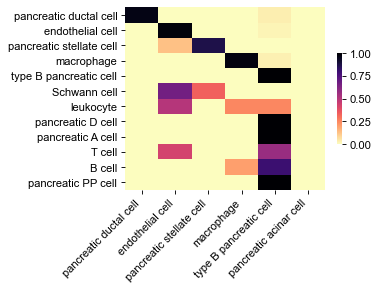

In [20]:
# contingency matrix for query dataset
y_true = obs['celltype'][obs_ids2].values
y_pred = obs['predicted'][obs_ids2].values
ax, contmat = pl.plot_contingency_mat(
    y_true, y_pred, norm_axis=1, 
    order_rows=False, order_cols=False,
)
pl._save_with_adjust(ax.figure, figdir / 'contingency_mat.png')
ax.figure

In [13]:
# ============== heatmap of predicted probabilities ==============
name_label = 'celltype'
cols_anno = ['celltype', 'predicted'][:]
df_probs = obs[list(classes)]

# probas_all = came.as_probabilities(
#     trainer.eval_current()['cell'], 
#     mode='sigmoid')
# df_probs = pd.DataFrame(probas_all, columns=classes)


# df_lbs = obs[cols_anno][obs[key_class1] == 'unknown'].sort_values(cols_anno)
df_lbs = obs[cols_anno].iloc[obs_ids2].sort_values(cols_anno)

indices = came.subsample_each_group(df_lbs['celltype'], n_out=50, )
# indices = df_lbs.index
df_data = df_probs.loc[indices, :].copy()
df_data = df_data[sorted(df_lbs['predicted'].unique())]  # .T
lbs = df_lbs[name_label][indices]

_ = pl.heatmap_probas(
    df_data.T, lbs, name_label='true label',
    figsize=(5, 3.), fp=figdir / f'heatmap_probas.pdf'
)


figure has been saved into:
	../_temp/('Baron_human', 'Baron_mouse')-(07-11 23.54.18)/figs/confusion_matrix.png
figure has been saved into:
	../_temp/('Baron_human', 'Baron_mouse')-(07-11 23.54.18)/figs/heatmap_probas.pdf


In [ ]:
# In[]
# ============== heatmap of predicted probabilities (loop test) ==============
name_label = 'celltype'
cols_anno = ['celltype', 'predicted'][:]

out_cell = trainer.eval_current()['cell']
probas_all = came.as_probabilities(out_cell, mode='sigmoid')
df_probs = pd.DataFrame(probas_all, columns=classes)

for i, _obs_ids in enumerate([obs_ids1, obs_ids2]):
    # df_lbs = obs[cols_anno][obs[key_class1] == 'unknown'].sort_values(cols_anno)
    df_lbs = obs[cols_anno].iloc[_obs_ids].sort_values(cols_anno)
    
    indices = came.subsample_each_group(df_lbs['celltype'], n_out=50, )
    # indices = df_lbs.index
    df_data = df_probs.loc[indices, :].copy()
    df_data = df_data[sorted(df_lbs['predicted'].unique())]  # .T
    lbs = df_lbs[name_label][indices]
    
    _ = pl.heatmap_probas(
        df_data.T, lbs, name_label='true label', 
        cmap_heat='RdBu_r',
        figsize=(5, 3.), fp=figdir / f'heatmap_probas-{i}.pdf'
    )

In [59]:
# In[]
''' ======================= further analysis =======================
--> make adata on hidden states
'''

h_dict = trainer.model.get_hidden_states(
    trainer.feat_dict, trainer.g, detach2np=True)
# h_dict = trainer.model.get_hidden_states()

adt = pp.make_adata(h_dict['cell'], obs=dpair.obs, assparse=False)
gadt = pp.make_adata(h_dict['gene'], obs=dpair.var.iloc[:, :2], assparse=False)

adt.write(resdir / 'adt_hidden_cell.h5ad')
gadt.write_h5ad(resdir / 'adt_hidden_gene.h5ad')
# category-bool in gadt.obs will raise error by scanpy


/Users/xingyan/.conda/envs/dgl/lib/python3.8/site-packages/anndata/_core/anndata.py:868: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
... storing 'cell_ontology_class' as categorical
... storing 'celltype' as categorical
... storing 'predicted' as categorical
... storing 'name' as categorical


adding columns to `adata.obs` (ignore_index=False):
original_name, dataset, cell_ontology_class, celltype, predicted, max_probs, is_right, type B pancreatic cell, pancreatic ductal cell, pancreatic A cell, pancreatic acinar cell, pancreatic PP cell, pancreatic D cell, pancreatic stellate cell, endothelial cell, macrophage, mast cell, Schwann cell, T cell, pancreatic epsilon cell, done!
adding columns to `adata.obs` (ignore_index=False):
name, dataset, done!


In [58]:
gadt.obs['is_linked']#.write(resdir / 'adt_hidden_gene.h5ad')

0        True
1       False
2       False
3        True
4        True
        ...  
6551     True
6552     True
6553     True
6554     True
6555     True
Name: is_linked, Length: 6556, dtype: category
Categories (2, object): [False, True]

In [52]:
adt, gadt, h_dict, dpair.var, dpair.obs


(AnnData object with n_obs × n_vars = 4028 × 128
     obs: 'original_name', 'dataset', 'cell_ontology_class', 'celltype', 'predicted', 'max_probs', 'is_right', 'type B pancreatic cell', 'pancreatic ductal cell', 'pancreatic A cell', 'pancreatic acinar cell', 'pancreatic PP cell', 'pancreatic D cell', 'pancreatic stellate cell', 'endothelial cell', 'macrophage', 'mast cell', 'Schwann cell', 'T cell', 'pancreatic epsilon cell',
 AnnData object with n_obs × n_vars = 6556 × 128
     obs: 'name', 'dataset', 'is_linked', 'is_linked_1v1',
 {'cell': array([[-0.        , -0.03034248, -0.12609266, ..., -0.        ,
           0.6815677 , -0.06892905],
         [-0.06838271,  1.9904488 , -0.12586349, ..., -0.01234404,
          -0.00864689, -0.05074186],
         [-0.10197974, -0.        , -0.12186553, ..., -0.        ,
           0.09990684, -0.02117719],
         ...,
         [-0.05560436,  1.043442  , -0.10516218, ..., -0.00777266,
          -0.01103809, -0.10216913],
         [-0.15268788,  

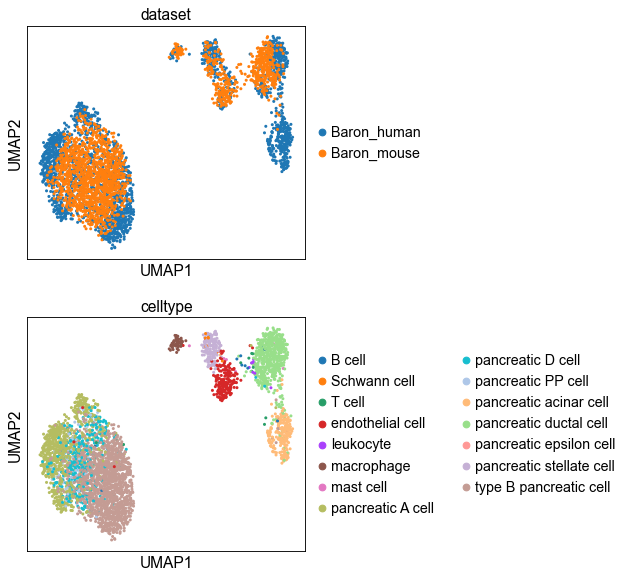

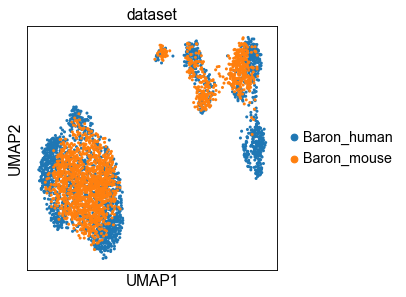

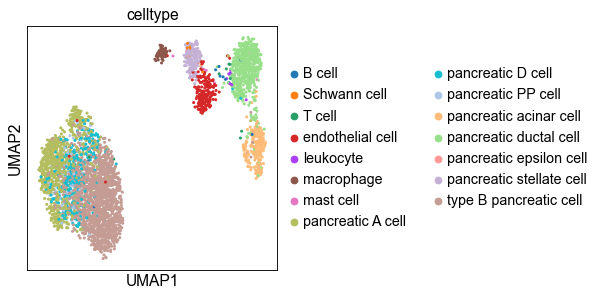

In [36]:
# In[]
'''======================= cell embeddings ======================='''
# from CAME_v0.utils.plot_pub import plot_pure_umap

sc.set_figure_params(dpi_save=200)

sc.pp.neighbors(adt, n_neighbors=15, metric='cosine', use_rep='X')
sc.tl.umap(adt)
sc.pl.umap(adt, color=['dataset', 'celltype'], ncols=1)
# setting UMAP to the original adata
obs_umap = adt.obsm['X_umap']
adata1.obsm['X_umap'] = obs_umap[obs_ids1]
adata2.obsm['X_umap'] = obs_umap[obs_ids2]

ftype = ['.svg', ''][1]
sc.pl.umap(adt, color='dataset', save=f'-dataset{ftype}')
sc.pl.umap(adt, color='celltype', save=f'-ctype{ftype}')

adt.write(resdir / 'adt_hidden_cell.h5ad')



In [43]:
adt.obs_names = adt.obs_names.astype(str)

In [44]:
# In[]
''' similaraties of cell-type embeddings
'''
dsn1, dsn2 = dsnames
adt.obs_names
adt1, adt2 = pp.bisplit_adata(adt, 'dataset', dsn1, reset_index_by='original_name')
avg_embed1 = pp.group_mean_adata(adt1, 'celltype')
avg_embed2 = pp.group_mean_adata(adt2, 'celltype')

from scipy.spatial.distance import cdist
dist = cdist(avg_embed1.values.T, avg_embed2.values.T, metric='cosine')
sim = pd.DataFrame(
        data=1 - dist,
        index=avg_embed1.columns, columns=avg_embed2.columns
        )           
ax = pl.heatmap(sim, order_col=True, order_row=True, figsize=(5, 4), 
                fp=resdir / 'celltype_embed_sim.png')
ax.figure.show()


Computing averages grouped by celltype
(13, 128)
Computing averages grouped by celltype
(12, 128)
Re-order the columns
Re-order the rows
figure has been saved into:
	../_temp/('Baron_human', 'Baron_mouse')-(07-11 23.54.18)/celltype_embed_sim.png


<ipython-input-44-c2a62aa0aa1f>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


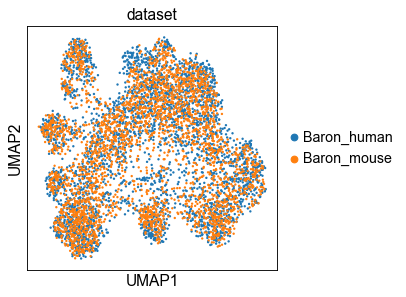

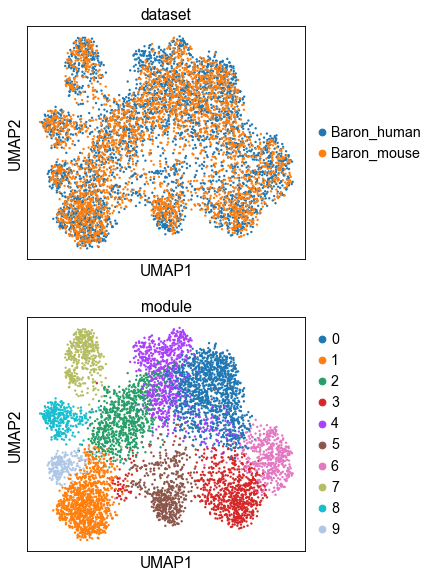

sorting links by weights


/Users/xingyan/.conda/envs/dgl/lib/python3.8/site-packages/anndata/_core/anndata.py:868: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['TCF25', 'CXCL2', 'CSRP3', 'AFAP1', 'IKZF3']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "obs")
/Users/xingyan/.conda/envs/dgl/lib/python3.8/site-packages/anndata/_core/anndata.py:868: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['Slc43a3', 'Ttr', 'D3Ertd751e', 'Gpr3', 'Gdf15']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "obs")


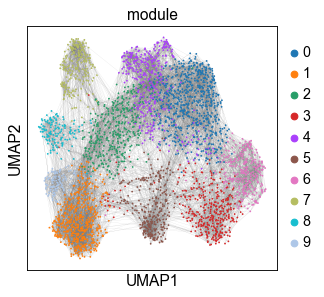

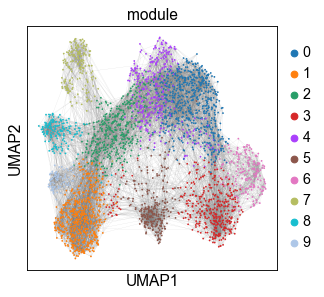

In [45]:
# In[]
'''===================== gene embeddings ====================='''
sc.set_figure_params(dpi_save=200)

sc.pp.neighbors(gadt, n_neighbors=15, metric='cosine', use_rep='X')
sc.tl.umap(gadt)
sc.pl.umap(gadt, color='dataset', )

''' joint gene module extraction '''
sc.tl.leiden(gadt, resolution=.8, key_added='module')
sc.pl.umap(gadt, color=['dataset', 'module'], ncols=1)

''' link-weights between homologous gene pairs '''
df_var_links = came.weight_linked_vars(
    gadt.X, dpair._vv_adj, names=dpair.get_vnode_names(),
    matric='cosine', index_names=dsnames,
)

# split
gadt.obs_names = gadt.obs_names.astype(str)
gadt1, gadt2 = pp.bisplit_adata(gadt, 'dataset', dsn1, reset_index_by='name')

color_by = 'module'
sc.pl.umap(gadt1, color=color_by, s=10, edges=True, edges_width=0.05,
           save=f'_{color_by}-{dsn1}')
sc.pl.umap(gadt2, color=color_by, s=10, edges=True, edges_width=0.05,
           save=f'_{color_by}-{dsn2}')



In [ ]:
# In[]
''' gene 3d map
'''



Computing averages grouped by cell_ontology_class
Calculating feature averages for 13 groups
['Schwann cell' 'T cell' 'endothelial cell' 'macrophage' 'mast cell'
 'pancreatic A cell' 'pancreatic D cell' 'pancreatic PP cell'
 'pancreatic acinar cell' 'pancreatic ductal cell'
 'pancreatic epsilon cell' 'pancreatic stellate cell'
 'type B pancreatic cell']
Computing averages grouped by cell_ontology_class
Calculating feature averages for 12 groups
['B cell' 'Schwann cell' 'T cell' 'endothelial cell' 'leukocyte'
 'macrophage' 'pancreatic A cell' 'pancreatic D cell' 'pancreatic PP cell'
 'pancreatic ductal cell' 'pancreatic stellate cell'
 'type B pancreatic cell']
adding columns to `adata.obs` (ignore_index=True):
Schwann cell, T cell, endothelial cell, macrophage, mast cell, pancreatic A cell, pancreatic D cell, pancreatic PP cell, pancreatic acinar cell, pancreatic ductal cell, pancreatic epsilon cell, pancreatic stellate cell, type B pancreatic cell, done!
adding columns to `adata.obs` 

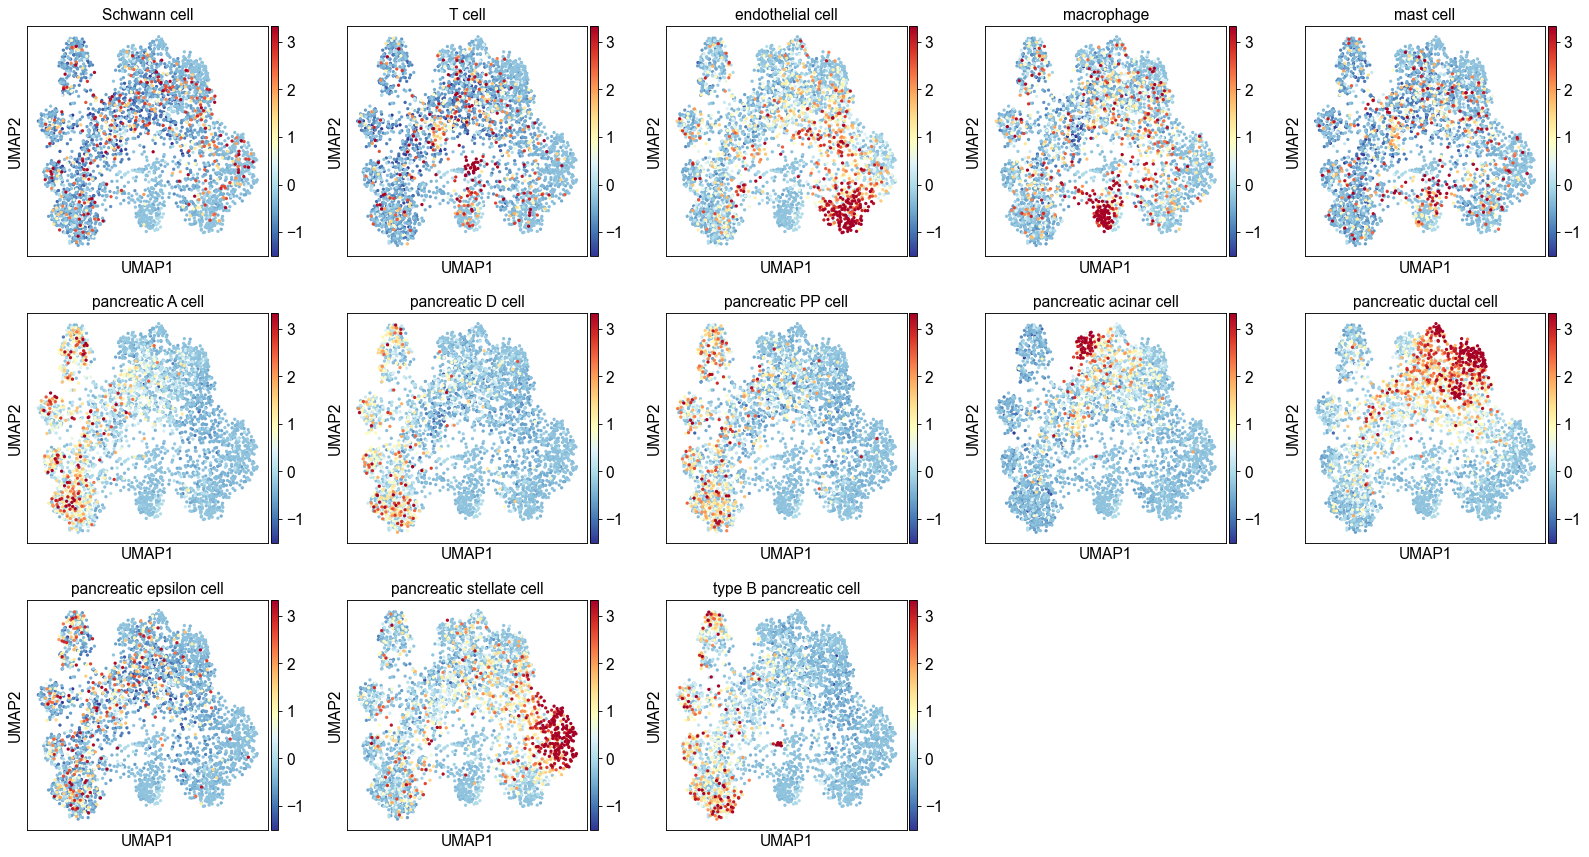

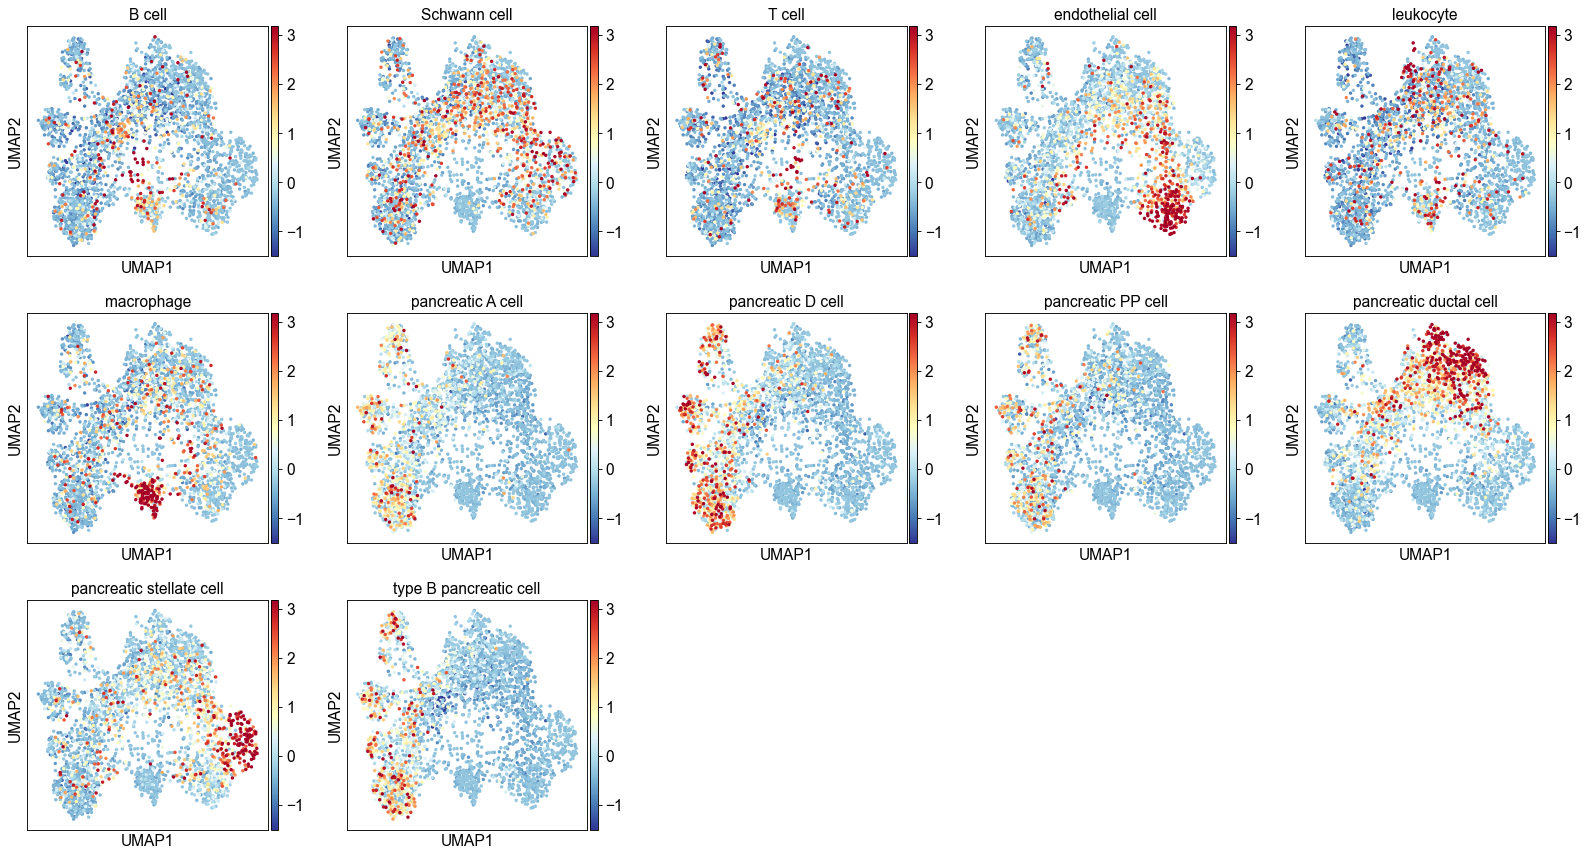

In [47]:
# In[]
''' ============ cell type gene-profiles on gene embeddings ============
'''
# averaged expressions
avg_expr1 = pp.group_mean_adata(adatas[0], groupby=key_class1,
                                features=dpair.vnode_names1, use_raw=True)
avg_expr2 = pp.group_mean_adata(adatas[1], groupby=key_class2,
                                features=dpair.vnode_names2, use_raw=True)
# adata_raw1.X.data

avg_expr_add1, avg_expr_add2 = list(map(
    lambda x: pp.zscore(x.T).T, (avg_expr1, avg_expr2)
))

# add annos
pp.add_obs_annos(gadt1, avg_expr_add1, ignore_index=True)
pp.add_obs_annos(gadt2, avg_expr_add2, ignore_index=True)

''' plot cell type gene-profiles (plot all the cell types) on UMAP '''
ctypes1 = avg_expr1.columns.tolist()
ctypes2 = avg_expr2.columns.tolist()
sc.set_figure_params(fontsize=14)
cmap_expr = 'RdYlBu_r'
vmax = None
vmin = - 1.5
plkwds = dict(color_map=cmap_expr, vmax=vmax, vmin=vmin, ncols=5, )
sc.pl.umap(gadt1, color=ctypes1,
           #           edges=True, size=50,
           save=f'_exprAvgs-{dsn1}-all.png', **plkwds)
sc.pl.umap(gadt2, color=ctypes2,
           #           edges=True, size=50,
           save=f'_exprAvgs-{dsn2}-all.png', **plkwds)

# gadt1.write(resdir / 'adt_hidden_gene1.h5ad')
# gadt2.write(resdir / 'adt_hidden_gene2.h5ad')


In [ ]:
# In[]
''' gene annotation on UMAP (top DEGs)
'''
fdir_gmap = resdir / 'gene_umap'
came.check_dirs(fdir_gmap)

adata1.obs[key_class1] = pd.Categorical(obs[key_class1][obs_ids1],
                                        categories=classes)
adata2.obs['predicted'] = pd.Categorical(obs['predicted'][obs_ids2],
                                         categories=classes)
pp.add_obs_annos(adata2, obs[classes].iloc[obs_ids2], ignore_index=True)

df_top1 = pp.compute_and_get_DEGs(adata1, key_class1, unique=False, )
df_top2 = pp.compute_and_get_DEGs(adata2, 'predicted',
                                  unique=False, )  # line 749
for _adt, sp, _df_top in zip([gadt1, gadt2],
                             (sp1, sp2),
                             (df_top1, df_top2),
                             ):
    for c in _df_top.columns[: 2]:
        text_ids = _df_top[c].head(10)

        nm = _adt.obs['dataset'][0]
        ftps = ['pdf', 'svg', 'png']
        ftp = ftps[1]
        if c not in _adt.obs.columns:
            continue
        ax = pl.umap_with_annotates(_adt, color=c, text_ids=text_ids,
                                    #                                      edges=True, size=30,
                                    title=f'{sp} {c}',
                                    index_col='name',
                                    fp=fdir_gmap / f'hexpr-{c}-{nm}.{ftp}',
                                    **plkwds)
        ax.figure



In [49]:
# In[]
''' =================== abstracted graph ====================  '''
norm_ov = ['max', 'zs', None][1]
cut_ov = 0.  # 5#(0.5, 2.5)
# norm_ov = 'zs'
# cut_ov = (0.5, 2.5)
ovby = ['expr', 'attn'][0]
groupby_var = 'module'
obs_labels1, obs_labels2 = adt.obs['celltype'][dpair.obs_ids1], \
                           adt.obs['celltype'][dpair.obs_ids2]
var_labels1, var_labels2 = gadt1.obs[groupby_var], gadt2.obs[groupby_var]

sp1, sp2 = 'human', 'mouse'
g = came.make_abstracted_graph(
    obs_labels1, obs_labels2,
    var_labels1, var_labels2,
    avg_expr1, avg_expr2,
    df_var_links,
    tags_obs=(f'{sp1} ', f'{sp2} '),
    tags_var=(f'{sp1} module ', f'{sp2} module '),
    cut_ov=cut_ov,
    norm_mtd_ov=norm_ov,
)

''' visualization '''
fp_abs = figdir / f'abstracted_graph-{groupby_var}-cut{cut_ov}-{norm_ov}-{ovby}.pdf'
ax = pl.plot_multipartite_graph(
    g, edge_scale=10,
    figsize=(9, 7.5), alpha=0.5, fp=fp_abs)  # nodelist=nodelist,

ax.figure
# unlabeled
ax = pl.plot_multipartite_graph(
    g, edge_scale=10, figsize=(9, 7.5), alpha=0.5,
    xscale=1.25,
    fp=figdir / f'abstracted_graph-nolabels.pdf',
    with_labels=False)  # nodelist=nodelist,



3421 3135
---> ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Edges with weights lower than 0 were cut out.
Edges with weights lower than 0 were cut out.
---> avg_vo1
                  Schwann cell    T cell  endothelial cell  macrophage  \
__temp_labels__                                                         
0                   -0.191889 -0.246011          0.344696    0.137301   
1                   -0.338496 -0.440526         -0.135832   -0.151983   
2                   -0.223087 -0.061279         -0.018686   -0.151418   
3                   -0.171332 -0.137073          1.925296    0.198827   
4                   -0.317960 -0.258952          0.122327    0.071435   
5                   -0.256456  0.532343         -0.236573    1.573409   
6                   -0.031281 -0.242848          0.339113   -0.076576   
7                   -0.362332 -0.448704         -0.183364   -0.070007   
8                   -0.404608 -0.487003          0.033638   -0.101811   
9                   -0.22

../CAME/utils/plot.py:879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodedf['plt_color'] = nodedf['subset'].apply(
../CAME/utils/plot.py:879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodedf['plt_color'] = nodedf['subset'].apply(
../CAME/utils/plot.py:879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodedf['plt_color'] = nodedf['subset'].apply(
../CAME/utils/plot.py:879: SettingWithCopyWarning: 
A value is trying to be set on

### TF-target exploration

In [ ]:
''' TF-target exploration '''

human_tf = pd.read_csv(f'../resources/TF/fantomTFs-human.csv')['Symbol']
mouse_tf = pd.read_csv(f'../resources/TF/fantomTFs-mouse.csv')['Symbol']
TFdict = {'mouse': mouse_tf,
          'human': human_tf,
          }

# In[]

''' annotate TFs on gene UMAP '''
